In [1]:
print("Hello, World!")

Hello, World!


In [ ]:
%pip install numpy
%pip install tensorflow.keras
%pip install tensorflow.keras.
%pip install pandas

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as tfl

In [4]:
credit_data = pd.read_csv('input/creditcard.csv')

In [11]:
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
credit_data.shape #shows dimensionality

(284807, 31)

In [13]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_data.describe() #shows statistical summary

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
X = credit_data.iloc[:,:30]
y = credit_data.iloc[:,30]

In [6]:
model = keras.Sequential([
    tfl.Input(shape = (30,)), #input layer with 30 features
    tfl.Dense(256,activation = 'sigmoid'), 
    tfl.Dense(1, activation = 'sigmoid')
])

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,193 (32.00 KB)

 Trainable params: 8,193 (32.00 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
def create_model():
    model = keras.Sequential([
        tfl.Input(shape=(30,)),
        tfl.Dense(units = 512, activation = 'sigmoid'),
        tfl.Dense(units = 512, activation = 'sigmoid'),
        tfl.Dense(units = 1, activation = 'sigmoid'),
         #compile the model
    ])
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [16]:
model = create_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,041 (1.06 MB)

 Trainable params: 279,041 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, epochs = 1) #train the model for 1 round with gradient descent

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.9971 - loss: 0.0158


In [18]:
fraud_mask = credit_data['Class'] == 1 #mask to filter fraud cases

fraud_data = credit_data[fraud_mask] #filter the data to only include fraud cases

X_fraud = fraud_data.iloc[:,:30]
y_fraud = fraud_data.iloc[:,30]

In [19]:
X_fraud.shape #shows the shape of the fraud data

(492, 30)

In [20]:
model.evaluate(X_fraud, y_fraud) #evaluate the model on the fraud data

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 6.8462 


[6.84614896774292, 0.0]

In [ ]:
model.predict(X_fraud[:10]) #predict the first 10 rows of the fraud data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0.00106355],
       [0.00106259],
       [0.00106351],
       [0.00106355],
       [0.00106355],
       [0.00106355],
       [0.00106355],
       [0.00106355],
       [0.00106355],
       [0.00106355]], dtype=float32)

In [22]:
class_totals = [len(y)-len(y_fraud),len(y_fraud)]
class_weight = {i:len(y)/(2*total) for i, total in enumerate(class_totals)}

In [ ]:
AUC = keras.metrics.AUC(curve = 'PR')

def create_model():
    model = keras.Sequential([
        tfl.Input(shape=(30,)),
        tfl.Dense(units = 64, activation = 'relu'),
        tfl.Dense(units = 64, activation = 'relu'),
        tfl.Dense(units = 1, activation = 'sigmoid'),
    ])
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy',AUC])
    return model #use better metric AUC

In [25]:
model = create_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,209 (24.25 KB)

 Trainable params: 6,209 (24.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.fit(X,y,epochs=10, class_weight = class_weight) #train the model for 10 rounds with gradient descent

Epoch 1/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 748us/step - accuracy: 0.5285 - auc: 0.0017 - loss: 1087.4905
Epoch 2/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 746us/step - accuracy: 0.5453 - auc: 0.0019 - loss: 62.6596
Epoch 3/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 753us/step - accuracy: 0.7175 - auc: 0.0056 - loss: 1.1559
Epoch 4/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 751us/step - accuracy: 0.6091 - auc: 0.0015 - loss: 0.8133
Epoch 5/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 768us/step - accuracy: 0.1760 - auc: 0.0016 - loss: 2.6307
Epoch 6/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 754us/step - accuracy: 0.1189 - auc: 0.0039 - loss: 0.7122
Epoch 7/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 756us/step - accuracy: 0.5944 - auc: 0.0024 - loss: 0.9173
Epoch 8/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 764us/step - accuracy: 0.8516 - auc: 0.0016 - loss: 1.3490
Epoch 9/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 754us/step - accuracy: 0.0891 - auc: 0.0016 - loss: 0.9183
Epoch 10/10
8901/8901 ━━━━━━━━━━━━━━━━━━━━ 7s 746us/step - a

In [28]:
def create_model(learning_rate):
    model = keras.Sequential([
        tfl.Input(shape=(30,)),
        tfl.Dense(units = 128, activation = 'leaky_relu'),
        tfl.Dense(units = 256, activation = 'leaky_relu'),
        tfl.Dense(units = 128, activation = 'leaky_relu'),
        tfl.Dense(units = 64, activation = 'leaky_relu'),
        tfl.Dense(1, activation = 'sigmoid')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate) #specify learning rate

    model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy',AUC])
    return model

In [30]:
%pip install scipy
%pip install scikit-learn
%pip install pytest
%pip install imbalanced-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 802.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
    --------------------------------------- 0.6/41.2 MB 20.5 MB/s eta 0:00:02
   -- ------------------------------------- 2.4/41.2 MB 30.7 MB/s eta 0:00:02
   --- ------------------------------------ 4.0/41.2 MB 31.7 MB/s eta 0:00:02
   ----- ---------------------------------- 5.9/41.2 MB 34.1 MB/s eta 0:00:02
   ------- -------------------------------- 7.7/41.2 MB 35.2 MB/s eta 0:00:01
   -------- ------------------------------- 9.1/41.2 MB 34.2 MB/s eta 0:00:01
   ---------- ----------------------------- 10.7/41.2 MB 36.4 MB/s eta 0:00:01
   ----------- ---------------------------- 12.3/41.2 MB 36.4 MB/s eta 0:00:01
   ------------- -------------------------- 14.0/41.2 MB 34.4 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.2/11.1 MB 6.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 22.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.1 MB 28.3 MB/s eta 0:00:01
   ------------------- -------------------- 5.4/11.1 MB 31.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 33.4 MB/s eta 0:00:01
   -------------------------------- ------- 9.0/11.1 MB 34.1 MB/s eta 0:00:01
   ---------------------------------------  10.9/11.1 MB 38.5 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 36.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ---------------------------------------- 301.8/301.8 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/343.6 kB ? eta -:--:--
   --------- ------------------------------ 81.9/343.6 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 343.6/343.6 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   --------------- ------------------------ 92.2/238.4 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from imblearn.over_sampling import RandomOverSampler
rom = RandomOverSampler()
X_res, y_res = rom.fit_resample(X, y) #oversample the data to balance the classes

In [32]:
learning_rate = 3e-3
step_decay = keras.callbacks.LearningRateScheduler(lambda epoch: learning_rate * 10**(- int (epoch/5)))
model = create_model(learning_rate)
model.fit(X_res, y_res, epochs = 20, callbacks = [step_decay])

Epoch 1/20
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 19s 994us/step - accuracy: 0.6978 - auc: 0.5894 - loss: 23.8774 - learning_rate: 0.0030
Epoch 2/20
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 18s 988us/step - accuracy: 0.8950 - auc: 0.9418 - loss: 2.7945 - learning_rate: 0.0030
Epoch 3/20
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 18s 996us/step - accuracy: 0.9006 - auc: 0.9343 - loss: 2.5201 - learning_rate: 0.0030
Epoch 4/20
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9160 - auc: 0.9479 - loss: 4.0831 - learning_rate: 0.0030
Epoch 5/20
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9236 - auc: 0.9613 - loss: 1.7649 - learning_rate: 0.0030
Epoch 6/20
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9282 - auc: 0.9680 - loss: 0.4148 - learning_rate: 3.0000e-04
Epoch 7/20
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step - accuracy: 0.9418 - auc: 0.9856 - loss: 0.1529 - learning_rate: 3.0000e-04
Epoch 8/20
17770/17770 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - accuracy: 0.9447 - auc:

best threshold: 0.99 bes F1: 0.7632311977715878


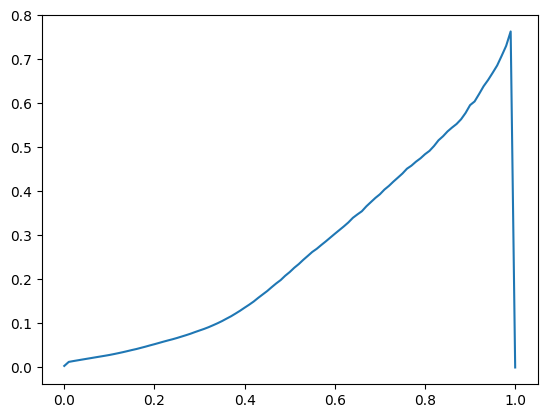

In [34]:
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt

best_threshold = -1
num_thresholds = 100

thresholds = []
scores = []
best_F1 = 0

for threshold in np.linspace(0,1,num_thresholds+1):
    y_pred = model.predict(X, batch_size = len(y), verbose = 0)
    y_pred = y_pred > threshold #apply threshold to predictions
    F1 = fbeta_score(y,y_pred, beta = 1)
    thresholds.append(threshold)
    scores.append(F1)

    if best_F1 < F1:
        best_F1 = F1
        best_threshold = threshold
plt.plot(thresholds, scores)

print('best threshold:', best_threshold, 'bes F1:', best_F1)

In [33]:
%pip install matplotlib

     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     -------------------------------------  102.4/104.0 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 104.0/104.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------- ------------------------------- 1.6/8.1 MB 34.6 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 39.2 MB/s eta 0:00:01
   --------------------------- ------------ 5.6/8.1 MB 39.7 MB/s eta 0:00:01
   -------------------------------------- - 7.8/8.1 MB 41.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 36.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/219.8 kB ? eta -:--:--
   ---------------------------------------- 219.8/219.8 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 45.1 MB/s eta 0:00:01
   --------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
